This code is designed to import and display the MRMS data

In [22]:
#import resources

import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os
import cartopy.feature as cfeature
import cartopy.mpl as cmpl

In [118]:
#import netCDF file
nc_file = nc.Dataset('/localdata/cases/20180519/merged_radar/merged/MESH/00.25/20180520-043752.netcdf','r')

In [119]:
u_lat = nc_file.Latitude #UPPER latitude
l_lon = nc_file.Longitude #LEFT Longitude
print (u_lat, l_lon)
spacing = 0.01 #MRMS spacing between points
data_crs = ccrs.PlateCarree()

41.49999999999999 -95.91


In [120]:
#makes the variable from the netCDF file into a local variable that we can use when plotting data
MRMS_var = nc_file.variables['MESH'][:,:]

#Getting the dimensions of x and y for plotting
len_x = len(MRMS_var[0,:])
len_y = len(MRMS_var[:,0])

#Setting array for x and y
x = np.arange(l_lon, l_lon+(len_x*spacing), spacing) #W->E
y = np.arange(u_lat, u_lat-(len_y*spacing), -spacing) #Because of plotting direction, latitudes are N->S

MRMS_var[MRMS_var<=0] = np.nan
#MRMS_var[MRMS_var<50.8] = np.nan
#MRMS_var[MRMS_var>=50.8] = True
print (MRMS_var.shape)
print (x.shape, y.shape)

(180, 452)
(452,) (180,)


In [121]:
print (x[0], y[0])
print (x[-1], y[-1])

-95.91 41.49999999999999
-91.39999999999769 39.71000000000035


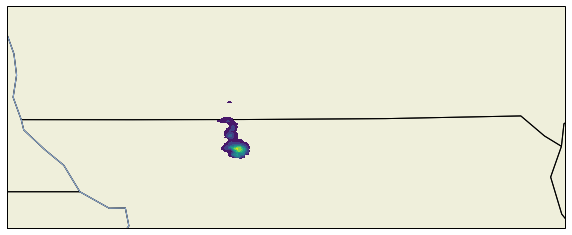

In [123]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-92))
one = ax.contourf(x, y, MRMS_var, zorder=10, transform=data_crs)
#ax.set_extent([-138, -60, 24, 55]) #CONUS
ax.set_extent([x[0], x[-1], y[-1], y[0]])
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.RIVERS)
#plt.colorbar(one)
plt.show()